This notebook follows 08_recreate_figure_5.

Inputs:
1. cell_metadata.csv was output from 03-make-cell-metadata
2. amacrine_expression.csv was output from 05-clean-data-from-retina_1
2. amacrine_cell_metadata.csv was output from 05-clean-data-from-retina_1
3. amacrine_gene_metadata.csv was output from 05-clean-data-from-retina_1

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
import fastcluster
import polo

# Get Data

In [2]:
expression = pd.read_csv('data/amacrine_expression.csv', index_col=0)
cell_metadata = pd.read_csv('data/amacrine_cell_metadata.csv', index_col=0)
gene_metadata = pd.read_csv( 'data/amacrine_gene_metadata.csv', index_col=0)

In [13]:
cell_metadata = pd.read_csv('data/cell_metadata.csv', index_col=0)
cluster_names = cell_metadata['cluster_id']
cluster_names.head()

cell
r1_GGCCGCAGTCCG    cluster_02
r1_CTTGTGCGGGAA    cluster_02
r1_GCGCAACTGCTC    cluster_02
r1_GATTGGGAGGCA    cluster_02
r1_GTGCCGCCTCTC    cluster_25
Name: cluster_id, dtype: object

In [14]:
mean_cluster_expression = expression.groupby(cluster_names, axis=0).mean()
mean_cluster_expression.head()

,1700025G04RIK,2610017I09RIK,2900011O08RIK,4833424O15RIK,4930447C04RIK,6330403K07RIK,6430548M08RIK,8430419L09RIK,A030009H04RIK,A830010M20RIK,...,YWHAG,YWHAH,ZCCHC12,ZCCHC18,ZEB2,ZFHX3,ZFP804A,ZMAT4,ZWINT,ZYX
cluster_id,,,,,,,,,,,,,,,,,,,,,
cluster_03,1.159091,0.0,1.022727,0.000000,0.477273,0.068182,1.568182,0.181818,0.704545,1.840909,...,1.045455,1.886364,0.000000,0.954545,0.568182,0.795455,0.000000,1.659091,1.363636,0.250000
cluster_04,0.461538,0.0,0.923077,1.000000,1.461538,0.538462,0.615385,0.153846,0.769231,0.692308,...,0.846154,1.692308,0.000000,1.538462,0.307692,1.153846,0.000000,0.615385,1.000000,0.153846
cluster_05,0.611111,0.0,3.722222,0.777778,0.722222,1.166667,1.722222,1.111111,2.333333,0.722222,...,0.555556,0.944444,0.222222,1.166667,3.166667,1.111111,0.111111,1.166667,2.111111,0.111111
cluster_06,0.595238,0.0,5.023810,0.714286,0.500000,1.380952,2.428571,0.547619,2.333333,0.904762,...,1.261905,1.238095,0.047619,1.023810,0.095238,1.285714,0.000000,0.452381,1.404762,0.023810
cluster_07,1.000000,0.0,4.981481,0.851852,0.296296,0.444444,3.018519,0.537037,2.000000,0.629630,...,1.444444,1.277778,0.037037,0.925926,0.185185,0.611111,0.111111,0.759259,2.222222,0.055556


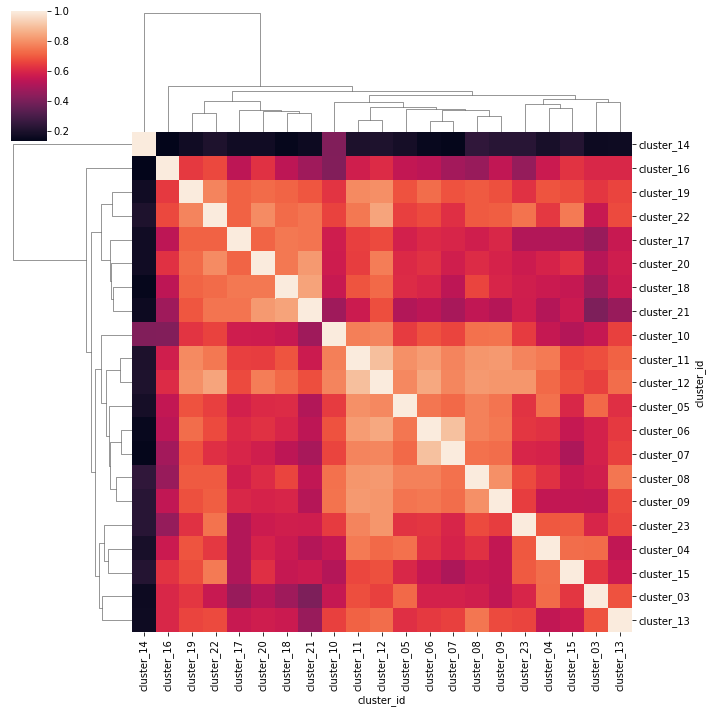

In [15]:
corr = mean_cluster_expression.T.corr()
sns.clustermap(corr)

In [8]:
expression_log = np.log2(expression+1)
print(expression_log.shape)
expression_log.head()

(714, 614)


,1700025G04RIK,2610017I09RIK,2900011O08RIK,4833424O15RIK,4930447C04RIK,6330403K07RIK,6430548M08RIK,8430419L09RIK,A030009H04RIK,A830010M20RIK,...,YWHAG,YWHAH,ZCCHC12,ZCCHC18,ZEB2,ZFHX3,ZFP804A,ZMAT4,ZWINT,ZYX
r1_GGGTGTCAGTGG,1.000000,0.0,4.584963,2.321928,2.000000,3.000000,3.459432,2.321928,2.000000,2.321928,...,3.000000,2.321928,0.0,2.584963,1.584963,3.000000,0.000000,2.000000,2.807355,0.000000
r1_GTTTATATGCGC,2.584963,0.0,3.321928,2.000000,1.000000,2.321928,2.321928,2.807355,3.321928,2.321928,...,2.000000,2.584963,1.0,3.169925,3.584963,2.321928,1.584963,2.000000,3.169925,0.000000
r1_TCTTCACTGGCT,2.584963,0.0,2.807355,0.000000,2.321928,2.584963,3.000000,0.000000,2.000000,3.321928,...,3.000000,2.584963,1.0,2.321928,2.000000,0.000000,2.000000,2.000000,3.584963,1.584963
r1_TCATTTAGTCGA,1.584963,1.0,3.906891,4.087463,0.000000,3.169925,0.000000,0.000000,2.000000,0.000000,...,3.584963,2.321928,1.0,2.584963,3.807355,0.000000,0.000000,0.000000,2.807355,0.000000
r1_GTCTATTCGGTT,0.000000,0.0,3.584963,4.321928,0.000000,1.584963,3.807355,1.584963,1.000000,1.000000,...,1.584963,3.459432,1.0,1.584963,1.000000,0.000000,1.000000,1.584963,1.000000,0.000000


In [9]:
expression_log_mean = expression_log.groupby(cluster_names, axis=0).mean()
print(expression_log_mean.shape)
expression_log_mean.head()

(21, 614)


,1700025G04RIK,2610017I09RIK,2900011O08RIK,4833424O15RIK,4930447C04RIK,6330403K07RIK,6430548M08RIK,8430419L09RIK,A030009H04RIK,A830010M20RIK,...,YWHAG,YWHAH,ZCCHC12,ZCCHC18,ZEB2,ZFHX3,ZFP804A,ZMAT4,ZWINT,ZYX
cluster_id,,,,,,,,,,,,,,,,,,,,,
cluster_03,0.761215,0.0,0.651404,0.000000,0.372553,0.058749,1.012408,0.172386,0.600786,1.076626,...,0.749521,1.068634,0.000000,0.710153,0.433564,0.584822,0.000000,1.044052,0.840946,0.240567
cluster_04,0.352689,0.0,0.750376,0.846154,1.094525,0.538462,0.454376,0.153846,0.673453,0.531299,...,0.782302,1.075175,0.000000,1.044997,0.243840,0.852063,0.000000,0.506536,0.564604,0.153846
cluster_05,0.453885,0.0,1.881549,0.620551,0.582881,0.864926,1.086153,0.720960,1.395166,0.582881,...,0.421387,0.718045,0.222222,0.829156,1.566557,0.799930,0.088053,0.852214,1.239841,0.088053
cluster_06,0.446545,0.0,2.244249,0.587185,0.408808,0.961334,1.452744,0.426355,1.423102,0.681609,...,0.936275,0.897997,0.047619,0.763346,0.075474,0.929037,0.000000,0.398926,0.990051,0.023810
cluster_07,0.735147,0.0,2.048786,0.652297,0.280925,0.402868,1.601280,0.456700,1.277725,0.541938,...,1.057767,0.920783,0.037037,0.720528,0.118376,0.394430,0.092593,0.618827,1.355065,0.055556


In [10]:
distances = fastcluster.pdist(expression_log_mean, metric='euclidean')

linkage = fastcluster.linkage(distances, method='ward')
linkage.shape

(20, 4)

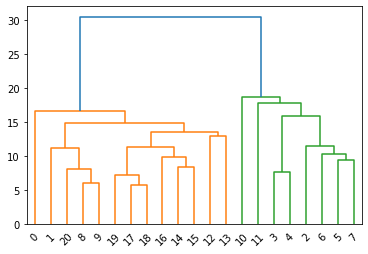

In [11]:
dendrogram(linkage);

In [12]:
olo_linkage = polo.optimal_leaf_ordering(linkage, distances)
olo_linkage.shape

(20, 4)

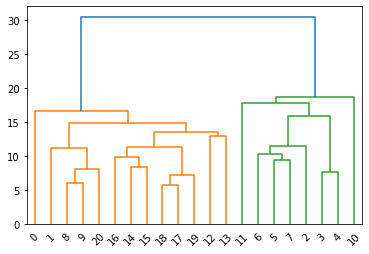

In [13]:
dendrogram(olo_linkage);

In [14]:
expression_log_mean.shape

(21, 614)

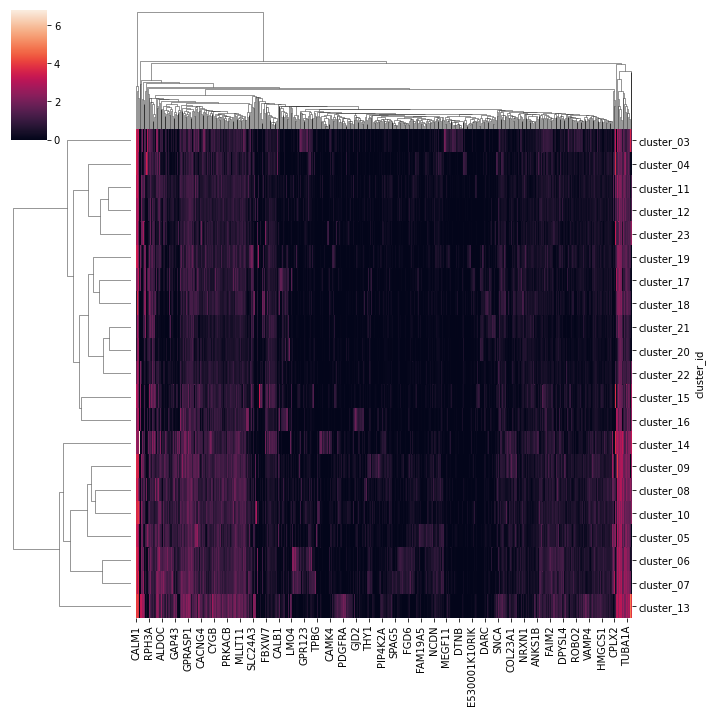

In [15]:
sns.clustermap(expression_log_mean,
               row_linkage=olo_linkage)

In [16]:
olo_linkage

array([[18.        , 17.        ,  5.7423853 ,  2.        ],
       [ 8.        ,  9.        ,  6.00740907,  2.        ],
       [21.        , 19.        ,  7.2527819 ,  3.        ],
       [ 3.        ,  4.        ,  7.66982925,  2.        ],
       [22.        , 20.        ,  8.06800235,  3.        ],
       [14.        , 15.        ,  8.36646439,  2.        ],
       [ 5.        ,  7.        ,  9.34152688,  2.        ],
       [16.        , 26.        ,  9.84292001,  3.        ],
       [ 6.        , 27.        , 10.26315893,  3.        ],
       [ 1.        , 25.        , 11.18842383,  4.        ],
       [28.        , 23.        , 11.27075963,  6.        ],
       [29.        ,  2.        , 11.40665472,  4.        ],
       [12.        , 13.        , 12.86798028,  2.        ],
       [31.        , 33.        , 13.56710103,  8.        ],
       [30.        , 34.        , 14.91715178, 12.        ],
       [32.        , 24.        , 15.90577869,  6.        ],
       [ 0.        , 35.